In [1]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr
import pickle

In [2]:
# version = 87804
# version = 72872
# version = 80525
# version = 15579
# version = 33060
# version = 11003

# version = 89776  # eps = 0.1
# version = 69083  # eps = 0.001
# version = 11900  # k3
version = 29324  # k=4
version = 29486  # k=5
version = 678 # M feature

results_path = f'sr_results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
assert len(reg.equations_) == 2
results = reg.equations_[0]  # equations for predicting the mean

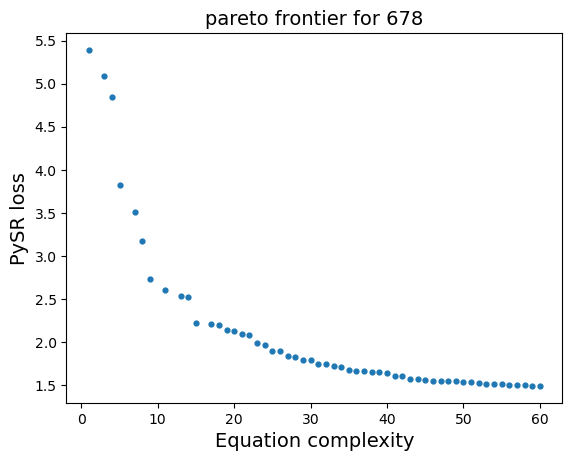

In [3]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y, s=12)
plt.xlabel('Equation complexity', fontsize=14)
plt.ylabel('PySR loss', fontsize=14)
plt.title(f'pareto frontier for {version}', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
# plt.ylim(0, max(y)+1)
# plt.title(f'pareto frontier for {version}')
plt.savefig(f'pareto_{version}.png')
plt.show()

In [4]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

print(len(labels) - len(skipped))

31


In [5]:
mass_indices = [labels.index(f'm{i}') for i in range(1, 4)]
print(mass_indices)

[35, 36, 37]


In [6]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,5.391124,0.000000,6.987807
1,3,5.085428,0.029187,(6.973138 + m5)
2,4,4.842594,0.048929,(sin(m5) - -6.9557877)
3,5,3.829153,0.234807,((s3 ^ -0.30657944) + 3.1138058)
4,7,3.505404,0.044169,(((s3 ^ -0.33051103) - m2) + 2.628619)
5,8,3.170517,0.100411,(((s3 ^ -0.32217455) + 2.8581138) + sin(m0))
6,9,2.734520,0.147939,((((s3 ^ -0.31939322) - m8) + m5) + 2.8581138)
7,11,2.605219,0.024220,((((s3 ^ -0.3114287) + (m5 - m8)) + 3.2143443)...
8,13,2.535115,0.013639,(((s9 * s3) ^ -0.1855383) + ((m5 - m8) + (s5 ^...
9,14,2.525401,0.003839,(((((s3 ^ -0.3114287) + 3.259013) - sin(s0)) +...


In [7]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 6.987807
1 (6.973138 + m5)
2 (sin(m5) - -6.9557877)
3 ((s3 ^ -0.30657944) + 3.1138058)
4 (((s3 ^ -0.33051103) - m2) + 2.628619)
5 (((s3 ^ -0.32217455) + 2.8581138) + sin(m0))
6 ((((s3 ^ -0.31939322) - m8) + m5) + 2.8581138)
7 ((((s3 ^ -0.3114287) + (m5 - m8)) + 3.2143443) - s6)
8 (((s9 * s3) ^ -0.1855383) + ((m5 - m8) + (s5 ^ s6)))
9 (((((s3 ^ -0.3114287) + 3.259013) - sin(s0)) + (m5 - m8)) - s6)
10 ((((s3 * (s3 * s0)) / ((1.308669 - m2) ^ 2.6926458)) ^ -0.13197672) - -2.0063496)
11 (((((s3 * (s3 * s0)) / ((1.308669 - m2) ^ 2.6926458)) ^ -0.13197672) + s3) - -2.0063496)
12 (((((s3 * (s3 * s0)) / ((1.308669 - m2) ^ 2.6926458)) ^ -0.13197672) + sin(s3)) - -2.0063496)
13 (((((s3 * (s3 * s0)) / ((1.314156 - m2) ^ 2.6926458)) ^ -0.13197672) - -1.9827135) - (-0.29506215 * m6))
14 (((((s3 * (s3 * s0)) / ((1.314156 - m2) ^ 2.628619)) ^ -0.13197672) - -1.9827135) - (sin(m6) / -2.1544268))
15 (((((s9 * ((s3 * 0.070277564) * (s0 + (s6 + 0.04410596)))) / (2.1265106 - m2)) ^ -0.13197672) + m5) - 

In [8]:
# s = reg.latex_table(precision=2, indices=[[1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29], [ 1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29]], columns=['equation', 'complexity', 'loss'])
s = reg.latex_table(precision=2, columns=['equation', 'complexity', 'loss'])

# replace m_ with \\mu_ and s_ with \\sigma_
s = s.replace('m_', '\\mu_')
s = s.replace('s_', '\\sigma_')

# remove the first 5 lines which are package imports
s = '\n'.join(s.split('\n')[5:])
print(s)

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}ccc@{}}
\toprule
Equation & Complexity & Loss \\
\midrule
$y_{0} = 7.0$ & $1$ & $5.4$ \\
$y_{0} = \mu_{5} + 7.0$ & $3$ & $5.1$ \\
$y_{0} = \sin{\left(\mu_{5} \right)} + 7.0$ & $4$ & $4.8$ \\
$y_{0} = \sigma_{3}^{-0.31} + 3.1$ & $5$ & $3.8$ \\
$y_{0} = - \mu_{2} + \sigma_{3}^{-0.33} + 2.6$ & $7$ & $3.5$ \\
$y_{0} = \sigma_{3}^{-0.32} + \sin{\left(\mu_{0} \right)} + 2.9$ & $8$ & $3.2$ \\
$y_{0} = \mu_{5} - \mu_{8} + \sigma_{3}^{-0.32} + 2.9$ & $9$ & $2.7$ \\
$y_{0} = \mu_{5} - \mu_{8} + \sigma_{3}^{-0.31} - \sigma_{6} + 3.2$ & $11$ & $2.6$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \mu_{5} - \mu_{8} + \sigma_{5}^{\sigma_{6}} + \left(\sigma_{3} \sigma_{9}\right)^{-0.19} \end{dmath*} \end{minipage} & $13$ & $2.5$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y_{0} = \mu_{5} - \mu_{8} + \sigma_{3}^{-0.31} - \sigma_{6} - \sin{\left(\sigma_{0} \right)} + 3.3 \end{dmath*} \end{minipage} & $14$ & $